In [ ]:
#create a kaggle folder
!mkdir -/.kaggle/


mkdir: invalid option -- '/'
Try 'mkdir --help' for more information.


In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess


Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 98% 419M/428M [00:08<00:00, 67.9MB/s]
100% 428M/428M [00:08<00:00, 53.6MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils


In [ ]:
paths=[]
labels=[]
for dirname,_,filenames in os.walk('/content/tess toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())
  if len(paths)==2800:
    break
print('Dataset is loaded')

Dataset is loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_tool_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_limb_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_numb_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_haze_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_gun_happy.wav']

In [ ]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [ ]:
#create a dataframe
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,happy
1,/content/tess toronto emotional speech set dat...,happy
2,/content/tess toronto emotional speech set dat...,happy
3,/content/tess toronto emotional speech set dat...,happy
4,/content/tess toronto emotional speech set dat...,happy


In [ ]:
df['label'].value_counts()


,count
label,
happy,400
ps,400
sad,400
disgust,400
neutral,400
fear,400
angry,400


In [ ]:
df['label_count']=df['label'].value_counts()

In [ ]:
df.drop('label_count',axis=1)

,speech,label
0,/content/tess toronto emotional speech set dat...,happy
1,/content/tess toronto emotional speech set dat...,happy
2,/content/tess toronto emotional speech set dat...,happy
3,/content/tess toronto emotional speech set dat...,happy
4,/content/tess toronto emotional speech set dat...,happy
...,...,...
2795,/content/tess toronto emotional speech set dat...,ps
2796,/content/tess toronto emotional speech set dat...,ps
2797,/content/tess toronto emotional speech set dat...,ps
2798,/content/tess toronto emotional speech set dat...,ps


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

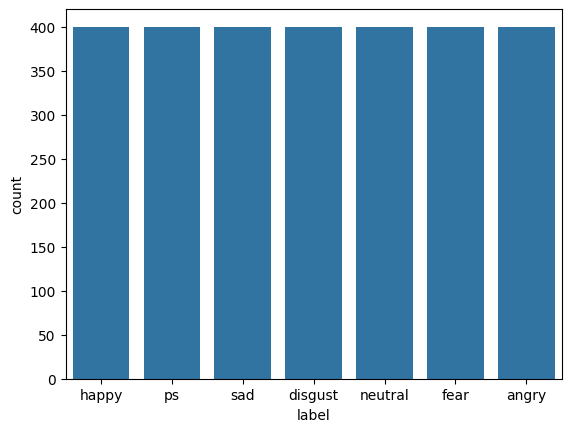

In [ ]:
sns.countplot(data=df,x='label')

In [ ]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion,size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion,size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

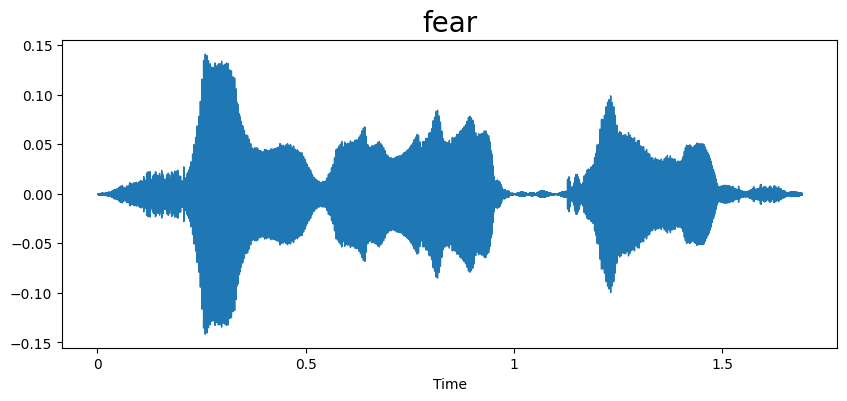

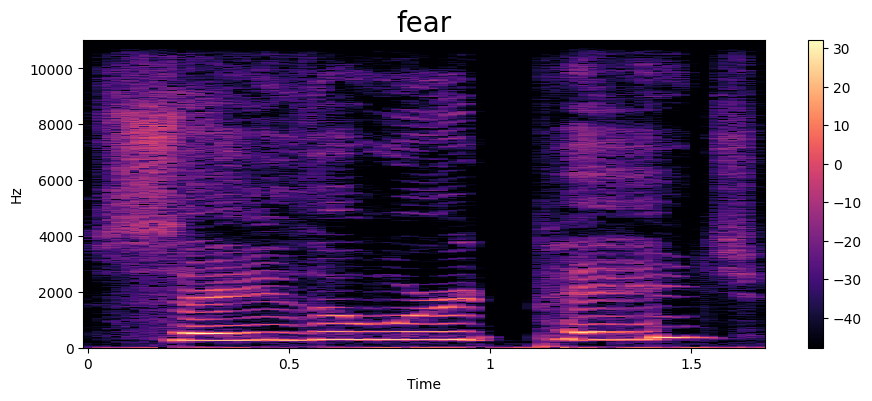

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

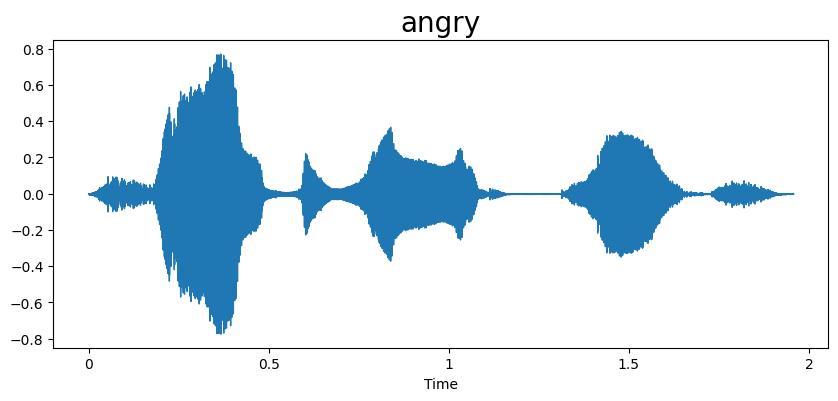

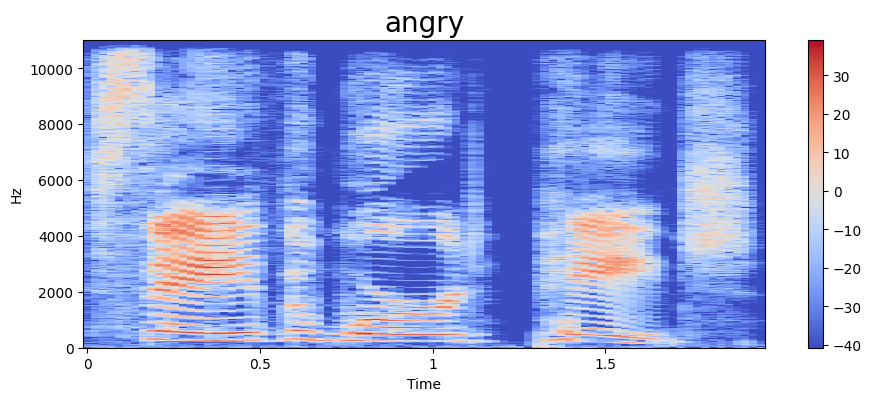

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

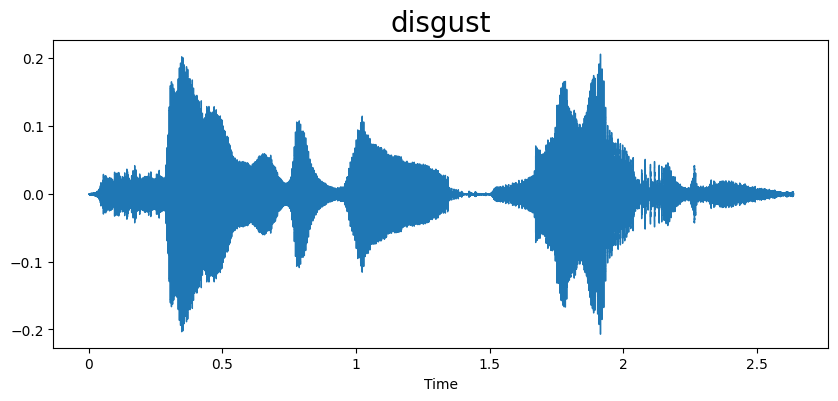

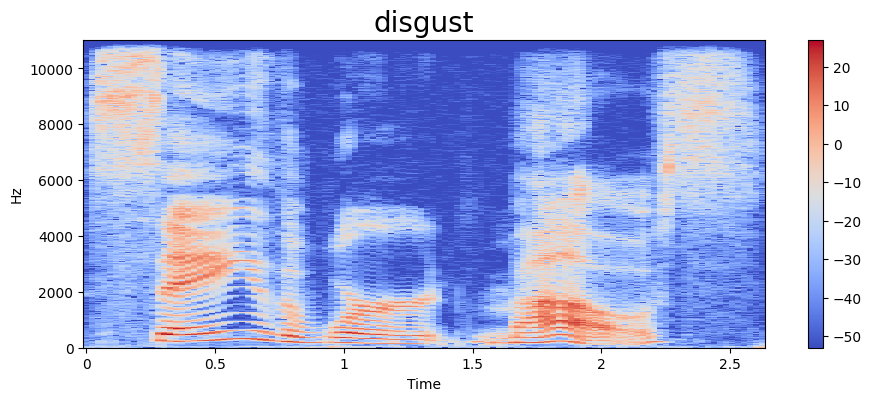

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

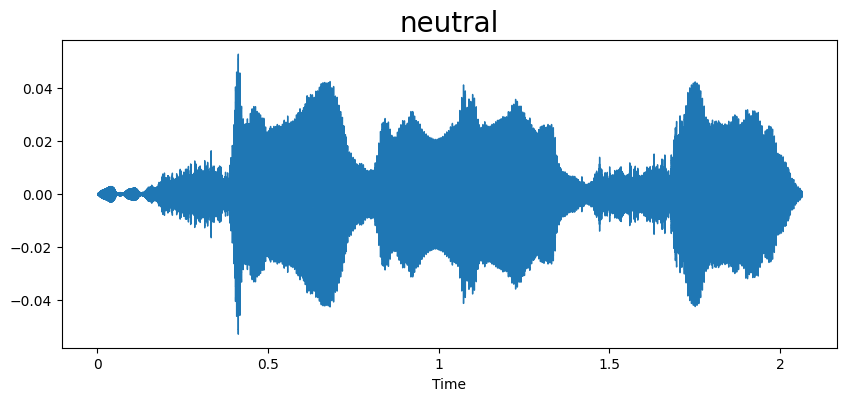

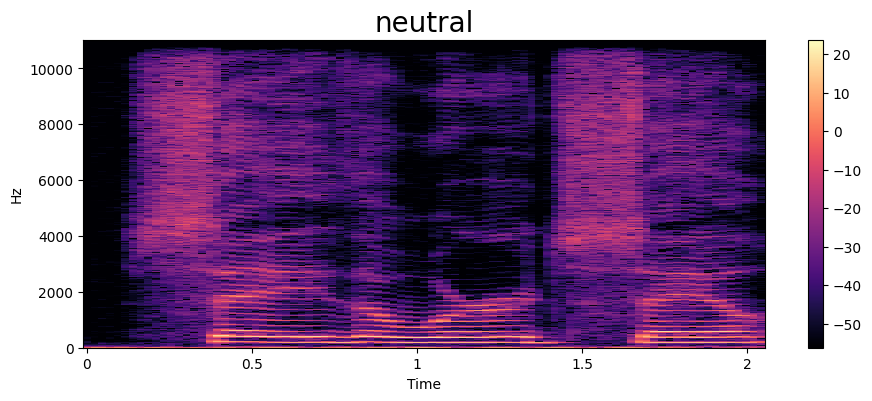

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

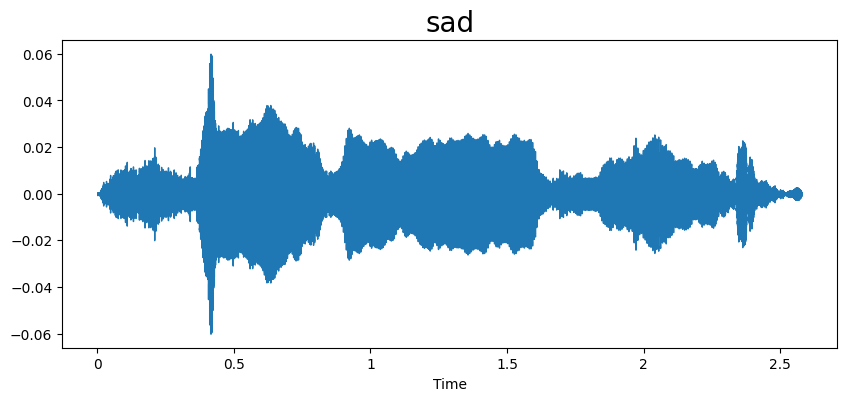

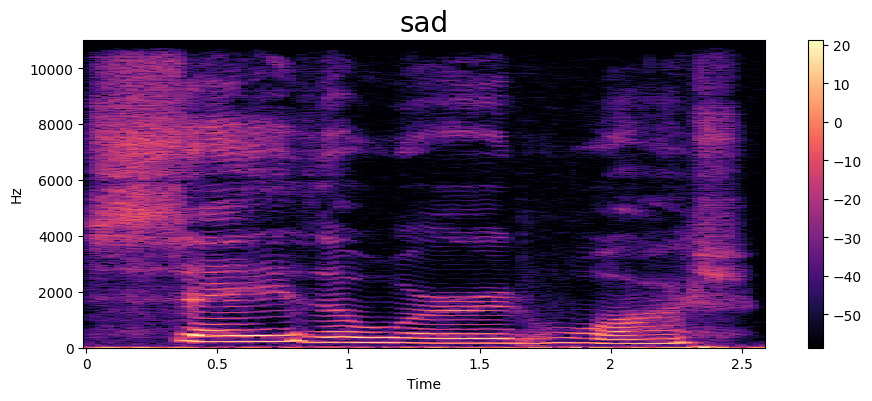

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

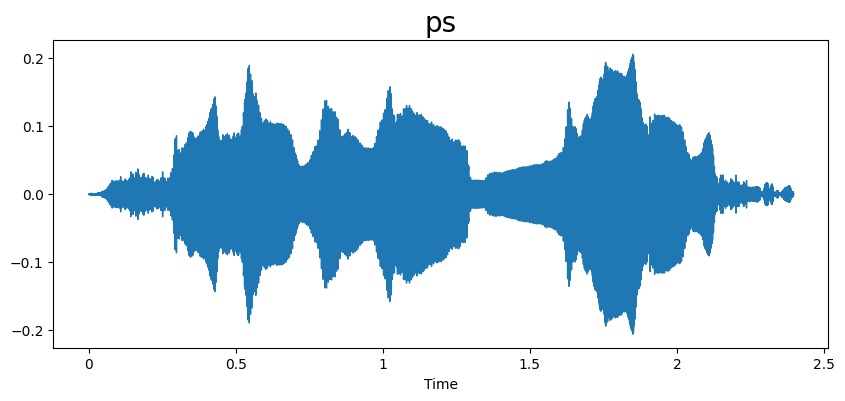

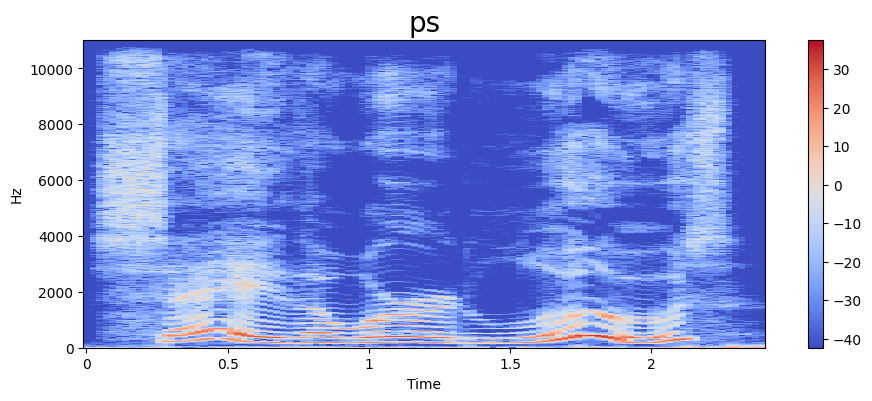

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

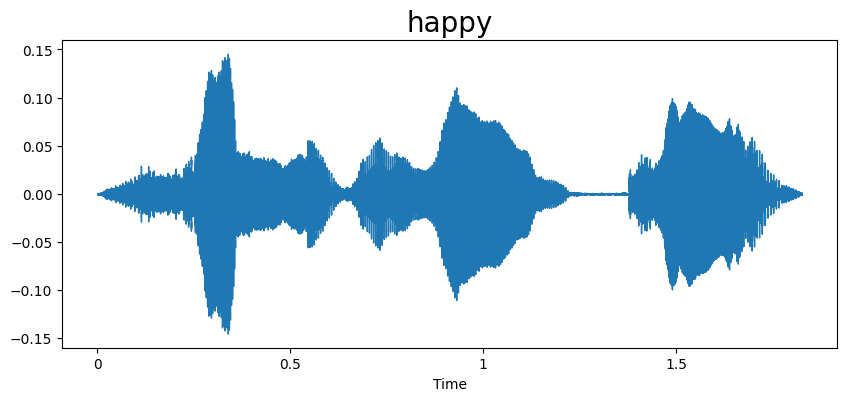

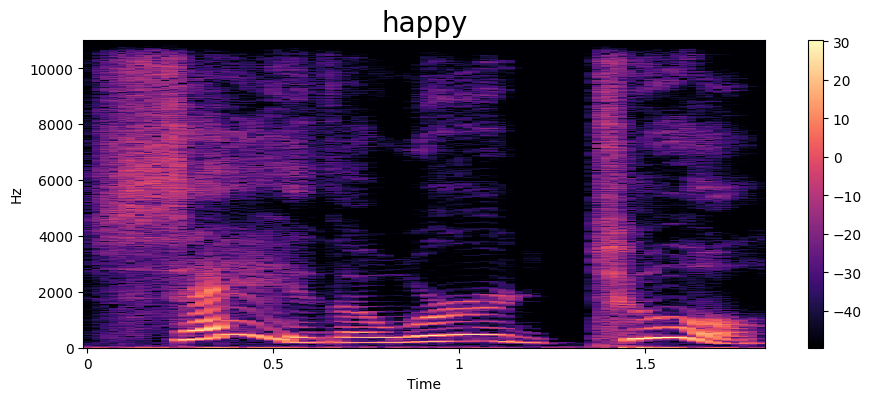

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
  y,sr=librosa.load(filename,duration=3,offset=0.350)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.5756140e+02,  1.0077437e+02,  3.1385860e+01, -5.8944950e+00,
       -1.9910023e+00, -4.4419422e+00, -6.1879377e+00, -8.5821009e-01,
       -1.9183945e+01, -2.1238055e+00, -1.5118605e+01, -1.5993084e+01,
       -5.5106807e+00, -3.1155550e+00, -7.9384714e-01,  2.4708033e+00,
       -3.7893456e-01,  7.9783459e+00,  2.7305532e+00, -1.0776937e+00,
        4.3103695e+00, -1.1190534e-02, -2.1575119e+00, -5.8412075e-01,
       -6.6280537e+00,  4.1986899e+00, -5.0519857e+00,  8.8241310e+00,
        9.2418313e-02,  1.2188707e+01,  6.8075814e+00,  5.7839756e+00,
        2.2017727e+00,  1.7312906e+00,  1.9525399e+00,  8.8079176e+00,
        1.0725798e+01,  1.3753297e+01,  1.0656391e+01,  7.8520260e+00],
      dtype=float32)

In [ ]:
x_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))

In [ ]:
x_mfcc

,speech
0,"[-457.5614, 100.77437, 31.38586, -5.894495, -1..."
1,"[-425.78232, 105.32223, 15.369417, -16.363218,..."
2,"[-466.66727, 119.360565, 32.02268, -12.7647705..."
3,"[-470.61505, 87.59865, 17.225664, 3.9606473, 5..."
4,"[-477.55908, 109.37653, 21.96437, -5.678839, 8..."
...,...
2795,"[-362.5311, 49.15533, 3.6057134, 15.029649, -9..."
2796,"[-371.39893, 80.3464, -5.3977833, -2.4726593, ..."
2797,"[-354.58597, 25.951483, -14.00127, 19.119709, ..."
2798,"[-339.39316, 85.8846, -18.831427, -18.883348, ..."


In [ ]:
x=[x for x in x_mfcc]
x=np.array(x)
x.shape

(2800, 40)

In [ ]:
#input split
x=np.expand_dims(x,-1)
x.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [ ]:
y=y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=.2,random_state=42)


create a LSTM Model


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model=Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(7,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
Model:"sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train model
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=30,batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 268ms/step - accuracy: 0.2089 - loss: 1.8758 - val_accuracy: 0.6571 - val_loss: 1.0327
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.5183 - loss: 1.2159 - val_accuracy: 0.8286 - val_loss: 0.4719
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.7189 - loss: 0.7327 - val_accuracy: 0.9054 - val_loss: 0.3214
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.8005 - loss: 0.5548 - val_accuracy: 0.9411 - val_loss: 0.1706
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - accuracy: 0.8835 - loss: 0.3631 - val_accuracy: 0.9625 - val_loss: 0.1454
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.9020 - loss: 0.3143 - val_accuracy: 0.9464 - val_loss: 0.1827
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.9298 - loss: 0.2507 - val_accuracy: 0.9286 - val_loss: 0.2604
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.9343 - loss: 0.2633 - val_accuracy

Visualize the results


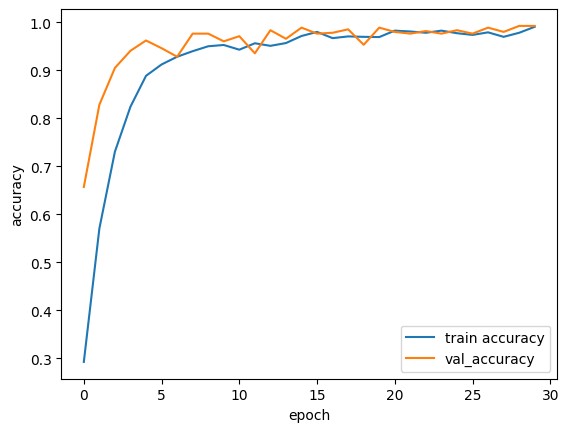

In [ ]:
epoch=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epoch,acc,label='train accuracy')
plt.plot(epoch,val_acc,label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

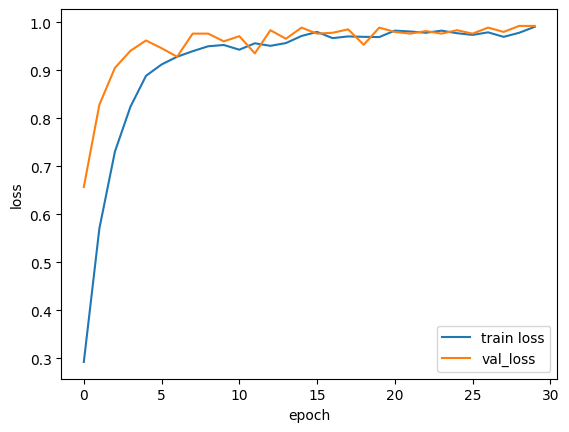

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epoch,acc,label='train loss')
plt.plot(epoch,val_acc,label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_val_classes=np.argmax(y_val,axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#compute cofusion matrix

conf_matrix=confusion_matrix(y_val_classes,y_pred_classes)

#print the confusion matrix
print("confusion matrix:")
print(conf_matrix)

confusion matrix:
[[74  0  1  0  0  1  0]
 [ 0 77  0  0  0  0  0]
 [ 0  0 86  0  0  0  0]
 [ 1  0  0 66  0  0  0]
 [ 0  0  0  0 90  0  0]
 [ 0  1  0  0  0 71  0]
 [ 0  0  0  0  0  0 92]]


In [ ]:
#print the classification report
target_names=['angry','disgust','fear','happy','neutral','ps','sad']
print("classification Report:")
print(classification_report(y_val_classes,y_pred_classes,target_names=target_names))

classification Report:
              precision    recall  f1-score   support

       angry       0.99      0.97      0.98        76
     disgust       0.99      1.00      0.99        77
        fear       0.99      1.00      0.99        86
       happy       1.00      0.99      0.99        67
     neutral       1.00      1.00      1.00        90
          ps       0.99      0.99      0.99        72
         sad       1.00      1.00      1.00        92

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



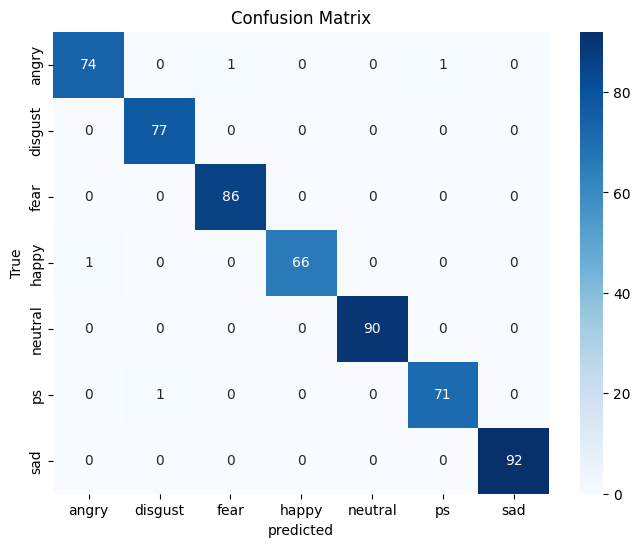

In [ ]:
#correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues',xticklabels=target_names,yticklabels=target_names)
plt.xlabel('predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save('emotion_recognition_model.h5')

In [ ]:
from keras.models import load_model

model = load_model('emotion_recognition_model.h5')

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.350)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
import numpy as np
import librosa

# Define the function to extract MFCC features
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.350)  # Load the audio file
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)  # Extract MFCC features
    return mfcc

# Path to the new audio file
new_audio_path = '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav'

# Extract MFCC features from the new audio file
new_mfcc = extract_mfcc(new_audio_path)

# Ensure the MFCC features are in the correct shape for the LSTM model
new_mfcc = np.expand_dims(new_mfcc, axis=(0, -1))  # Shape should be (1, 40, 1)

# Load the trained model (make sure to replace with the correct path)
from keras.models import load_model
model = load_model('emotion_recognition_model.h5')

# Make a prediction
predictions = model.predict(new_mfcc)
predicted_class = np.argmax(predictions, axis=1)

# Map the predicted class to emotion label
from sklearn.preprocessing import OneHotEncoder

# Load encoder to map the class index to emotion label
encoder = OneHotEncoder(categories=[['ps', 'fear', 'happy', 'sad', 'disgust', 'neutral', 'angry']])
encoder.fit([[label] for label in ['ps', 'fear', 'happy', 'sad', 'disgust', 'neutral', 'angry']])

emotion_labels = encoder.categories_[0]  # Get the labels used in encoding
predicted_emotion = emotion_labels[predicted_class][0]

print(f'Predicted Emotion: {predicted_emotion}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
Predicted Emotion: ps


In [ ]:
predictions = model.predict(new_mfcc)
predicted_class = np.argmax(predictions, axis=1)
emotion_labels = enc.categories_[0]  # Get the labels used in encoding

predicted_emotion = emotion_labels[predicted_class][0]
print(f'Predicted Emotion: {predicted_emotion}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Emotion: angry


In [ ]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9925 - loss: 0.0294
Test Loss: 0.028369566425681114
Test Accuracy: 0.9928571581840515


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step


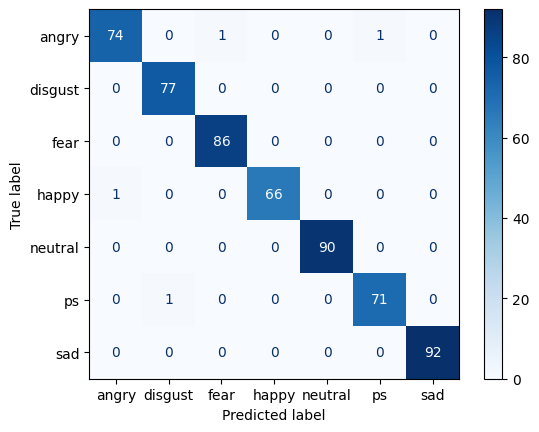

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=enc.categories_[0])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
from keras_tuner import RandomSearch
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                   return_sequences=False,
                   input_shape=(40, 1)))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(7, activation='softmax'))

    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=10,
                     executions_per_trial=1,
                     directory='tuner_dir',
                     project_name='emotion_recognition')

tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
best_model = tuner.get_best_models(num_models=1)[0]


Trial 10 Complete [00h 02m 17s]
val_accuracy: 0.9892857074737549

Best val_accuracy So Far: 0.9892857074737549
Total elapsed time: 00h 14m 40s


In [ ]:
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(40, 1)),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])


In [ ]:
import librosa
def augment_audio(file_path):
    y, sr = librosa.load(file_path)
    y_augmented = librosa.effects.time_stretch(y, rate=1.1)  # Speed up
    y_augmented = librosa.effects.pitch_shift(y_augmented, sr, n_steps=2)  # Pitch shift
    return y_augmented


In [ ]:
def extract_chroma(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.350)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    return np.mean(chroma.T, axis=0)

new_chroma = extract_chroma(new_audio_path)
new_chroma = np.expand_dims(new_chroma, axis=(0, -1))


In [ ]:
def extract_features(filename):
    mfcc = extract_mfcc(filename)
    chroma = extract_chroma(filename)
    features = np.concatenate([mfcc, chroma])
    return features

new_features = extract_features(new_audio_path)
new_features = np.expand_dims(new_features, axis=(0, -1))
